In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/googleplaystore/googleplaystore.csv


# google play store predection

In [3]:
#google play sstore
import pandas as pd #data cleaning 
import numpy as np #array calclations
import matplotlib.pyplot as plt #visualisation
import seaborn as sns #advanced analysis visualisation 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
#import the data
df = pd.read_csv('/kaggle/input/googleplaystore/googleplaystore.csv')

#pandas data cleaning
* clean empty cells (null value)
* clean wrong format (data types)
* clean wrong data (mistakes in data)
* remove duplicates

In [5]:
#understand your data
#data information
#details of your data
df.head(100)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,All of the parking lot - National Park applica...,AUTO_AND_VEHICLES,4.0,1754,14M,"500,000+",Free,0,Everyone,Auto & Vehicles,2-Jun-18,2.3.4,4.0 and up
96,Inquiry Fines and Debits of Vehicles,AUTO_AND_VEHICLES,4.4,2680,2.2M,"500,000+",Free,0,Everyone,Auto & Vehicles,20-Mar-18,1.03,4.0.3 and up
97,Gas Station,AUTO_AND_VEHICLES,4.0,1288,4.5M,"100,000+",Free,0,Everyone,Auto & Vehicles,21-Apr-18,2.17,4.0 and up
98,Hush - Beauty for Everyone,BEAUTY,4.7,18900,17M,"500,000+",Free,0,Everyone,Beauty,2-Aug-18,6.10.1,5.0 and up


In [6]:
df.shape

(10841, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [10]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
df['Reviews']=df['Reviews'].astype('int')

In [12]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [13]:
df['Installs']=df['Installs'].str.replace('+','')
df['Installs']=df['Installs'].str.replace(',','')

/tmp/ipykernel_32/3707023661.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs']=df['Installs'].str.replace('+','')


In [14]:
df['Installs']=df['Installs'].astype('int')

In [15]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [16]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0,Everyone,Medical,2-Aug-18,1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,Varies with device,10000,Paid,$2.49,Everyone,Lifestyle,30-Jul-18,Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,$1.49,Everyone,Arcade,8-Feb-17,1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19M,5,Free,0,Everyone,Arcade,23-Jul-18,1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6.1M,10,Free,0,Everyone,Arcade,11-Mar-17,0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4.2M,10,Free,0,Teen,Social,23-Jul-18,1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16M,1,Paid,$0.99,Everyone,Arcade,3-Mar-17,1,2.3 and up


In [17]:
df[df['Reviews']>df['Installs']].index

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [18]:
df.drop(df[df['Reviews']>df['Installs']].index,inplace=True)

In [19]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [20]:
df.shape

(9353, 13)

In [21]:
df['Installs'].quantile([0.1,0.25,0.5,0.75,0.90,0.95,0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.75      5000000.0
0.90     10000000.0
0.95    100000000.0
0.99    500000000.0
Name: Installs, dtype: float64

In [22]:
df[df['Installs']>500000000].shape

(58, 13)

In [23]:
df[df['Installs']>500000000].index

Int64Index([ 152,  335,  336,  338,  340,  341,  381,  382,  386,  391,  411,
             451,  464,  468,  865, 1654, 1700, 1750, 1872, 1917, 2544, 2545,
            2554, 2604, 2611, 2808, 2853, 2884, 3117, 3127, 3223, 3232, 3234,
            3454, 3523, 3565, 3665, 3687, 3736, 3765, 3816, 3896, 3904, 3909,
            3928, 3943, 3996, 4096, 4098, 4104, 4144, 4150, 4153, 4170, 4234,
            5395, 5856, 9844],
           dtype='int64')

In [24]:
df.drop(df[df['Installs']>500000000].index,inplace=True)

In [25]:
df[df['Installs']>500000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [26]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [27]:
df['Price']=df['Price'].str.replace('$','')
df['Price']=df['Price'].astype('float')

/tmp/ipykernel_32/1895281583.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price']=df['Price'].str.replace('$','')


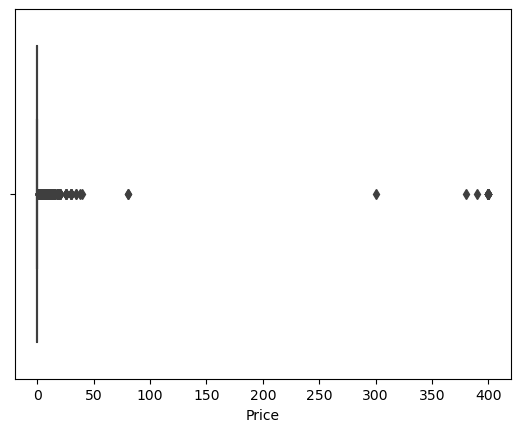

In [28]:
sns.boxplot(x='Price',data=df)
plt.show()

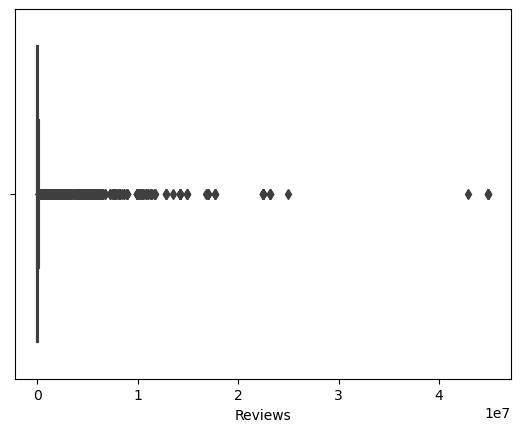

In [29]:
sns.boxplot(x='Reviews',data=df)
plt.show()

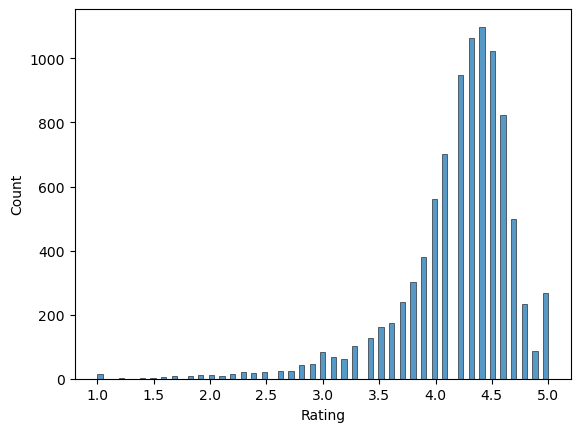

In [30]:
sns.histplot(x='Rating',data=df)
plt.show()

In [31]:
df.shape

(9295, 13)

In [32]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9295, dtype: object

In [63]:
def change_size(size):
    if'M' in size:
        x=size[:-1]
        x=float(x)*1000
        return x
    if 'k'in size:
        x=size[:-1]
        x=float(x)
        return x
    else :
        return None 

In [34]:
df['Size']=df['Size'].apply(change_size)

In [35]:
df['Size']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        NaN
10840    19000.0
Name: Size, Length: 9295, dtype: float64

In [36]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1588
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [37]:
df['Size'].fillna(method='ffill',inplace=True)

In [38]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

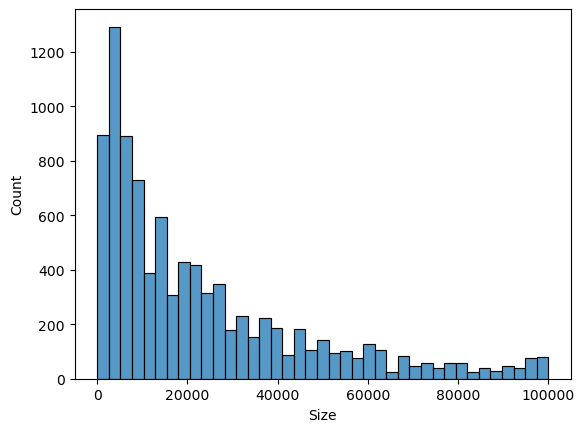

In [39]:
sns.histplot(x='Size',data=df)
plt.show()

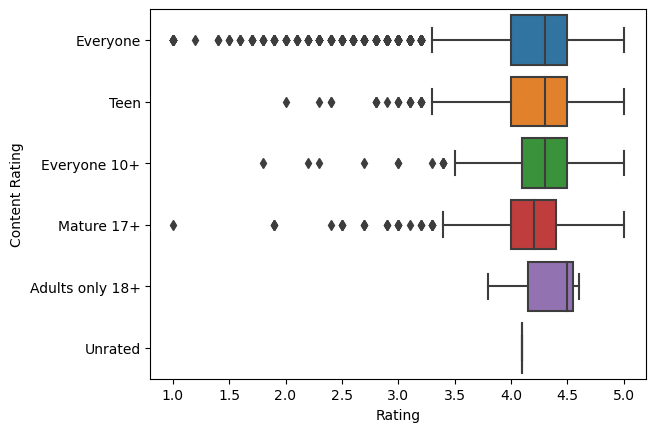

In [40]:
sns.boxplot(x='Rating',y='Content Rating',data=df)
plt.show()

In [41]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

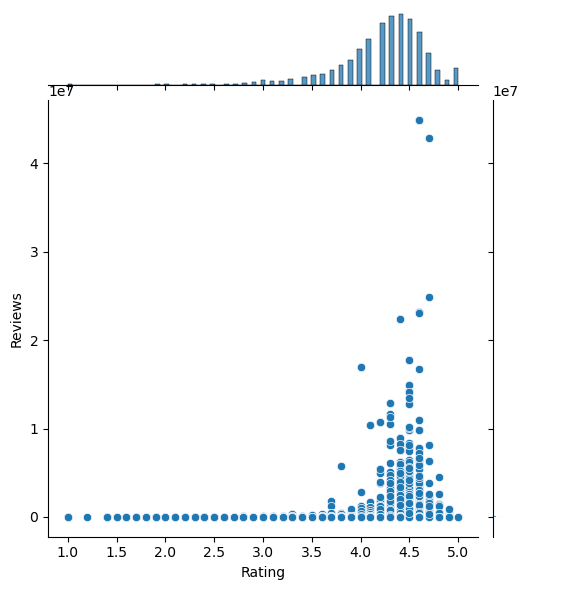

In [42]:
sns.jointplot(x='Rating',y='Reviews',data=df)
plt.show()

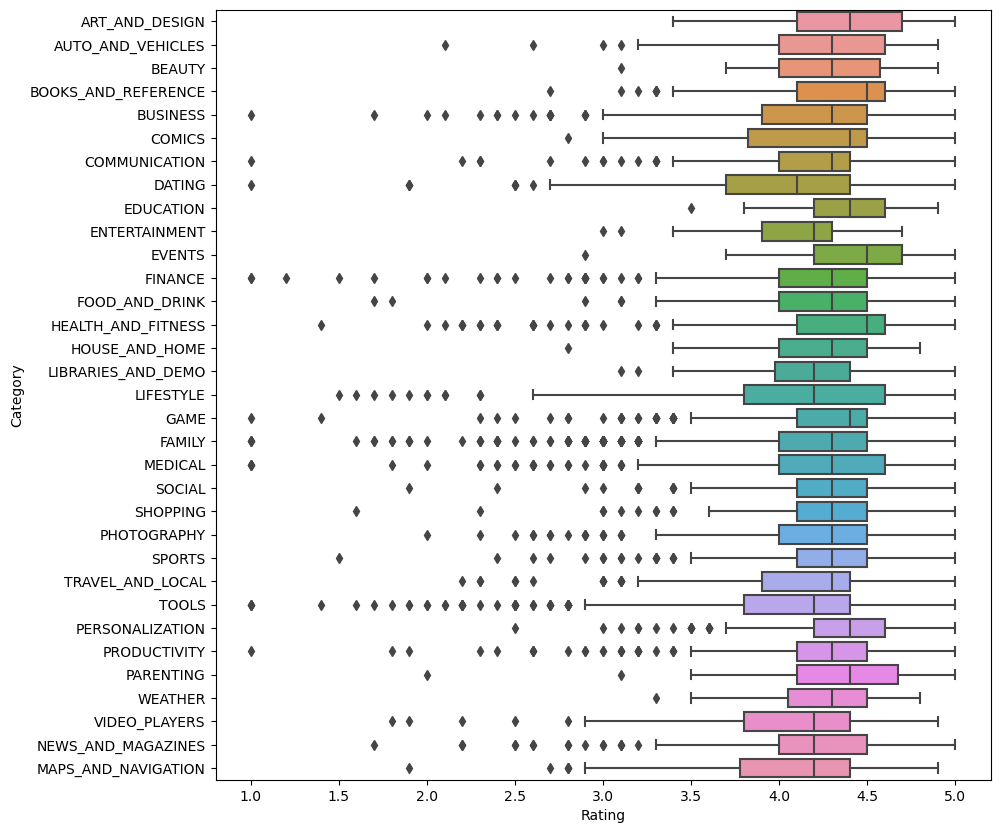

In [43]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Rating',y='Category',data=df)
plt.show()

In [44]:
inp1=df.copy()

In [45]:
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [46]:
inp1['Reviews']=inp1['Reviews'].apply(np.log1p)
inp1['Installs']=inp1['Installs'].apply(np.log1p)

In [47]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [48]:
inp1.drop(['App','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [49]:
inp1.shape

(9295, 9)

In [50]:
inp1.dtypes

Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

In [51]:
inp1

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,2.079442,2600.0,6.216606,Free,0.0,Everyone,Education
10836,FAMILY,4.5,3.663562,53000.0,8.517393,Free,0.0,Everyone,Education
10837,FAMILY,5.0,1.609438,3600.0,4.615121,Free,0.0,Everyone,Education
10839,BOOKS_AND_REFERENCE,4.5,4.744932,3600.0,6.908755,Free,0.0,Mature 17+,Books & Reference


In [52]:
inp1['Category'].value_counts()

FAMILY                 1745
GAME                   1087
TOOLS                   731
MEDICAL                 349
PRODUCTIVITY            347
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             313
LIFESTYLE               313
PERSONALIZATION         312
COMMUNICATION           309
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  250
SHOPPING                238
NEWS_AND_MAGAZINES      229
TRAVEL_AND_LOCAL        221
DATING                  195
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           157
EDUCATION               155
ENTERTAINMENT           148
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

# LINEAR REGRESSION

In [53]:
inp2=pd.get_dummies(inp1)

In [54]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,12.281389,25000.0,17.727534,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
inp2.shape

(9295, 161)

In [56]:
y=inp2.pop('Rating')
x=inp2

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [58]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)
y_pred=linear_reg.predict(x_test)

In [59]:
x_train.shape

(6506, 160)

In [60]:
y_train.shape

(6506,)

# Analysis of linear regression

* MSE
* R2_score

In [61]:
from sklearn.metrics import mean_squared_error
print("MSE=",mean_squared_error(y_test,y_pred))

MSE= 0.23393924946695913


In [62]:
from sklearn.metrics import r2_score
print("R2 Score=",r2_score(y_test,y_pred))

R2 Score= 0.15224587462756856
